<a href="https://colab.research.google.com/github/novalsungkar/Data-Scientist/blob/main/SERTIFIKASI_A11_2019_12263.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Mengumpulkan data
mengambil dataset dari UCI Dataset : hepatitis.data
mencari informasi dataset pada link https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data

# 2) Menelaah Data

In [ ]:
#Menelaah data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Load Dataset

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data'
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [ ]:
# Memberi nama header atribut atau fitur (karena fitur tidak terlihat maka perlu kita beri nama terlebih dahulu)

df.columns = ['CLASS', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM',
'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']

df.head()

,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


# 3) Memvalidasi Data

In [ ]:
# Cek dataframe yang missing dengan tanda "?"
df.head()

,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [ ]:
# Merubah nilai "?" menjadi "NaN" dengan library numpy.nan
df.replace("?", np.nan, inplace=True)

In [ ]:
# Melihat hasil setelah dirubah => semula "?" menjadi "NaN"
df.head()

,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1


In [ ]:
# Mengecek apakah dataframe ada nilai kosong atau "NaN"
df.isnull().values.any()

True

In [ ]:
# Melihat lokasi pada kolom dataframe yang kosong atau "NaN"
df.loc[:, df.isnull().any()].columns

Index(['STEROID', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM',
       'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN',
       'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME'],
      dtype='object')

In [ ]:
# Melihat prosentasi dari nilai kosong (NaN) untuk ANTIVIRALS dan HISTOLOGY
df.loc[:,list(df.loc[:,df.isnull().any()].columns)].isnull().sum()/(len(df))*100

STEROID             0.645161
FATIGUE             0.645161
MALAISE             0.645161
ANOREXIA            0.645161
LIVER BIG           6.451613
LIVER FIRM          7.096774
SPLEEN PALPABLE     3.225806
SPIDERS             3.225806
ASCITES             3.225806
VARICES             3.225806
BILIRUBIN           3.870968
ALK PHOSPHATE      18.709677
SGOT                2.580645
ALBUMIN            10.322581
PROTIME            43.225806
dtype: float64

In [ ]:
# Gunakan Replace Missing Values untuk ANTIVIRALS dan HISTOLOGY
df[['STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER BIG', 'LIVER FIRM',
'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']]

,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME
0,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN
1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN
2,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN
3,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80
4,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2,2,1,1,1,2,2,2,1,1,1,7.60,NaN,242,3.3,50
151,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,NaN
152,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,NaN
153,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48


# 4) Menentukan Objek Data

# 5) Membersihkan Data

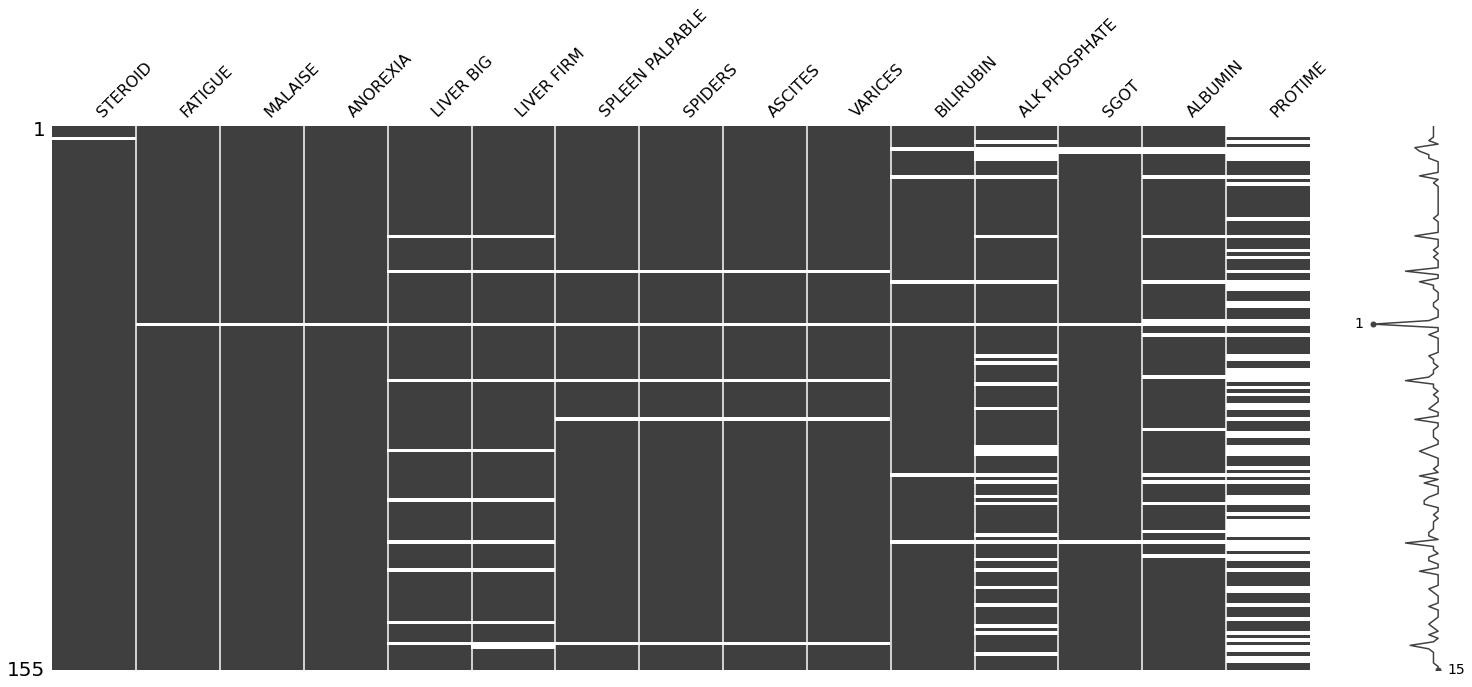

In [ ]:
# Memperbaiki nilai yang hilang
# Visualisasi data nilai yang hilang
missingdata_df = df.columns[df.isnull().any()].tolist()
missingno.matrix(df[missingdata_df])

In [ ]:
# Memperbaiki nilai yang hilang dengan nilai rata-rata (median) => fillna : untuk mengisi nilai yang kosong
median_value = df['STEROID'].median()
df['STEROID']=df['STEROID'].fillna(median_value)

median_value = df['ANTIVIRALS'].median()
df['ANTIVIRALS']=df['ANTIVIRALS'].fillna(median_value)

median_value = df['FATIGUE'].median()
df['FATIGUE']=df['FATIGUE'].fillna(median_value)

median_value = df['MALAISE'].median()
df['MALAISE']=df['MALAISE'].fillna(median_value)

median_value = df['ANOREXIA'].median()
df['ANOREXIA']=df['ANOREXIA'].fillna(median_value)

median_value = df['LIVER BIG'].median()
df['LIVER BIG']=df['LIVER BIG'].fillna(median_value)

median_value = df['LIVER FIRM'].median()
df['LIVER FIRM']=df['LIVER FIRM'].fillna(median_value)

median_value = df['SPLEEN PALPABLE'].median()
df['SPLEEN PALPABLE']=df['SPLEEN PALPABLE'].fillna(median_value)

median_value = df['SPIDERS'].median()
df['SPIDERS']=df['SPIDERS'].fillna(median_value)

median_value = df['ASCITES'].median()
df['ASCITES']=df['ASCITES'].fillna(median_value)

median_value = df['VARICES'].median()
df['VARICES']=df['VARICES'].fillna(median_value)

median_value = df['BILIRUBIN'].median()
df['BILIRUBIN']=df['BILIRUBIN'].fillna(median_value)

median_value = df['ALK PHOSPHATE'].median()
df['ALK PHOSPHATE']=df['ALK PHOSPHATE'].fillna(median_value)

median_value = df['SGOT'].median()
df['SGOT']=df['SGOT'].fillna(median_value)

median_value = df['ALBUMIN'].median()
df['ALBUMIN']=df['ALBUMIN'].fillna(median_value)

median_value = df['PROTIME'].median()
df['PROTIME']=df['PROTIME'].fillna(median_value)

In [ ]:
# Melihat kembali prosentasi dari nilai kosong (NaN) untuk ANTIVIRALS dan HISTOLOGY setelah dibersihkan
df.loc[:,list(df.loc[:,df.isnull().any()].columns)].isnull().sum()/(len(df))*100

Series([], dtype: float64)

In [ ]:
# Menghapus Data Duplikat
# Melihat ukuran baris dan kolom dataframe
df.shape

(155, 20)

In [ ]:
# Menghapus Data Duplikat dan melihat kembali ukuran baris & kolom dataframe
df = df.drop_duplicates()
df.shape

(155, 20)

In [ ]:
# Menghapus fitur yang bernilai konstant
df = df.loc[:, df.apply(pd.Series.nunique) !=1]

df.shape

(155, 20)

# 6) Mengkonstruksi Data

In [ ]:
# Mengecek Representasi Fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CLASS            155 non-null    int64 
 1   AGE              155 non-null    int64 
 2   SEX              155 non-null    int64 
 3   STEROID          155 non-null    object
 4   ANTIVIRALS       155 non-null    int64 
 5   FATIGUE          155 non-null    object
 6   MALAISE          155 non-null    object
 7   ANOREXIA         155 non-null    object
 8   LIVER BIG        155 non-null    object
 9   LIVER FIRM       155 non-null    object
 10  SPLEEN PALPABLE  155 non-null    object
 11  SPIDERS          155 non-null    object
 12  ASCITES          155 non-null    object
 13  VARICES          155 non-null    object
 14  BILIRUBIN        155 non-null    object
 15  ALK PHOSPHATE    155 non-null    object
 16  SGOT             155 non-null    object
 17  ALBUMIN          155 non-null    ob

In [ ]:
# Mengubah yang tipe Object menjadi int64
df['CLASS'] = pd.factorize(df.CLASS)[0]

In [ ]:
# Cek kembali Representasi Fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CLASS            155 non-null    int64 
 1   AGE              155 non-null    int64 
 2   SEX              155 non-null    int64 
 3   STEROID          155 non-null    object
 4   ANTIVIRALS       155 non-null    int64 
 5   FATIGUE          155 non-null    object
 6   MALAISE          155 non-null    object
 7   ANOREXIA         155 non-null    object
 8   LIVER BIG        155 non-null    object
 9   LIVER FIRM       155 non-null    object
 10  SPLEEN PALPABLE  155 non-null    object
 11  SPIDERS          155 non-null    object
 12  ASCITES          155 non-null    object
 13  VARICES          155 non-null    object
 14  BILIRUBIN        155 non-null    object
 15  ALK PHOSPHATE    155 non-null    object
 16  SGOT             155 non-null    object
 17  ALBUMIN          155 non-null    ob

In [ ]:
# Membagi Training dan Testing
X = df.iloc[:,1:32]
y = df['CLASS']

# Menampilkan X
X.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,61.0,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,61.0,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,61.0,1
3,31,1,2.0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85.0,200,4.0,61.0,1


In [ ]:
# Menampilkan y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: CLASS, dtype: int64

# Data Original

In [ ]:
# Membagi data menjadi training = 70% dan testing = 30%
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=2022)

In [ ]:
# Menampilkan Data
X_train.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
44,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85.0,86,4.0,61.0,1
131,31,1,1,2,1,1,1,2,2,1,2,2,2,8.00,85.0,101,2.2,61.0,2
118,61,1,1,2,1,1,2,2.0,2.0,2,1,2,2,1.0,85.0,58.0,4.0,61.0,2
104,47,1,2,2,1,1,2,2,1,2,2,1,1,1.70,86,20,2.1,46,2
149,36,1,2,2,2,2,2,2,2,2,2,2,2,0.60,120,30,4.0,61.0,2


# Data Normalisasi

In [ ]:
# Normalisasi menggunakan StandardScaler
X_norm = StandardScaler().fit_transform(X)

In [ ]:
# Melihat hasil normalisasi dengan StandardScaler
X_norm

array([[-0.89419175,  2.94745653, -1.01954582, ...,  0.2654787 ,
        -0.02822528, -0.90748521],
       [ 0.70257923, -0.33927557, -1.01954582, ..., -0.5445449 ,
        -0.02822528, -0.90748521],
       [ 2.93805862, -0.33927557,  0.98082889, ...,  0.2654787 ,
        -0.02822528, -0.90748521],
       ...,
       [ 1.58080328, -0.33927557, -1.01954582, ...,  0.42748342,
        -0.02822528,  1.10194633],
       [ 0.94209488,  2.94745653, -1.01954582, ...,  0.42748342,
        -0.78654456,  1.10194633],
       [ 0.14370939, -0.33927557,  0.98082889, ..., -1.19256378,
        -1.13653807,  1.10194633]])

In [ ]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y, test_size=0.3, random_state=2022)

# Data Original PCA

In [ ]:
pca = PCA(random_state=2022)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(ori_pca_array)
print("Heads of Original_PCA:",ori_pca.head())
var_ratio = pca.explained_variance_ratio_
print("\n Explained Variance Ratio:",var_ratio)
sv = pca.singular_values_
print("\n Singular Value:",sv)

Heads of Original_PCA:            0          1          2          3         4         5         6   \
0  -68.863383  -7.226667   0.571652 -10.810913 -0.329652  0.245087  0.271609   
1  -38.181731  38.965919   1.148371   9.208673 -0.655258  0.096673  0.331492   
2  -52.968113   1.767768  10.337385  35.998821 -1.097862  0.766997  0.309567   
3  -40.945507 -51.634975 -15.780679  -6.316186 -0.334316  0.346526 -0.212825   
4  111.459266 -31.839650  -2.652018  -8.119962 -0.878871  0.804854 -0.277073   

         7         8         9         10        11        12        13  \
0 -0.046717 -0.887312 -0.005123  0.114419 -0.585146 -0.246575 -0.018294   
1 -0.428258 -0.616035 -0.099101  0.188595 -0.144191 -0.595597  0.078421   
2 -0.305853  0.567562 -0.198522  0.224355  0.086456 -0.305317  0.021871   
3 -0.156056  0.073860 -0.498856 -0.305837 -0.066768  0.667327  0.079782   
4 -0.191460  0.133466 -0.289803  0.054003 -0.295630 -0.097851  0.139645   

         14        15        16        17    

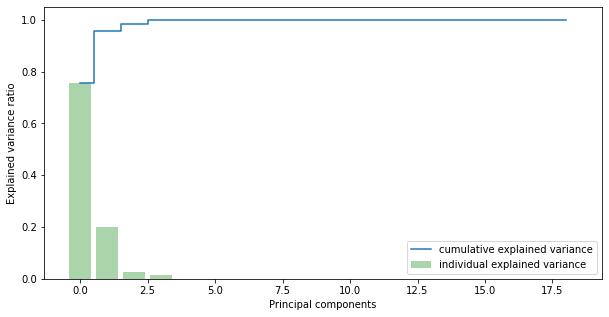

Cumulative explained ratio: [0.75639126 0.95801733 0.98540763 0.99964793 0.99978269 0.99982495
 0.99985342 0.99988074 0.99990481 0.99992416 0.99993859 0.99994975
 0.99995992 0.99996903 0.9999771  0.99998404 0.99999001 0.99999546
 1.        ]


In [ ]:
# Visualisasi Data Original PCA
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
        var_ratio,
        alpha=0.3333,
        align='center',
        label='individual explained variance',
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio,
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)

In [ ]:
# Dipilih 18 PC
pca = PCA(n_components=18, random_state=2022)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(data=norm_pca_array, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])


In [ ]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(ori_pca,y, test_size=0.3, random_state=2022)

# Data Normalisasi PCA

In [ ]:
pca = PCA(random_state=2022)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(norm_pca_array)
print("Heads of iris_pca:",norm_pca.head())
var_ratio = pca.explained_variance_ratio_
print("\n Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("\n Singular Value:",sv)

Heads of iris_pca:          0         1         2         3         4         5         6   \
0 -1.895595  1.621352 -0.501163 -0.153212  0.176635  1.659710 -1.657174   
1 -0.477798  1.267833 -0.254832 -1.126155  0.275712 -0.693623 -1.011173   
2 -1.090697 -0.473097  0.012668 -1.828578  0.382059 -0.347054  1.178633   
3 -3.044841 -0.428505  0.259024  0.085812 -1.206058  0.324624  0.944460   
4 -1.925182 -1.144302 -0.011571  0.720511  1.277375 -0.078406  0.609376   

         7         8         9         10        11        12        13  \
0  0.111295  0.120208 -0.310161  2.629895 -1.086091 -0.350524 -0.507154   
1  0.102702 -0.738911  0.282129  0.191191 -1.536781  0.755189 -0.394859   
2 -1.902332 -1.185417  0.244891 -0.617183 -0.505393  1.297717 -0.469368   
3  0.642219  0.798147  0.933300 -0.357623  0.603960 -0.645554 -0.360678   
4  0.320288 -0.119101  0.041483  0.000750 -0.564704 -0.451871  0.079541   

         14        15        16        17        18  
0  0.053782 -0.822844  0.

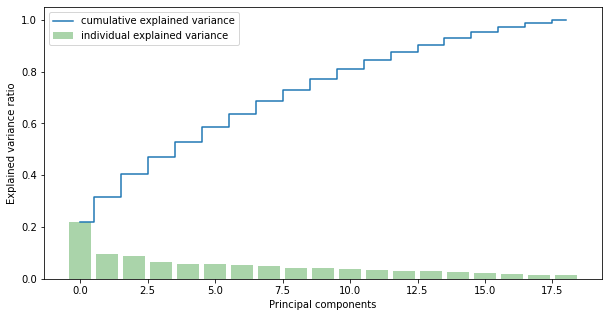

In [ ]:
# Visualisasi Data Normalisasi PCA
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
        var_ratio,
        alpha=0.3333,
        align='center',
        label='individual explained variance',
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio,
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()


In [ ]:
# Dipilih 18 PC
pca = PCA(n_components=18, random_state=2022)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(data=norm_pca_array, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])


In [ ]:
X_train_norm_pca, X_test_norm_pca, Y_train_norm_pca, Y_test_norm_pca = train_test_split(norm_pca,y, test_size=0.3, random_state=2022)

# Menentukan Label Data

# 8) Membangun Model

# Pemodelan Decision Tree

In [ ]:
# Pemodelan Decision Tree
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier()),
                          ])

In [ ]:
# menyiapkan parameter yang digunakan
parameters_dt = {
                "model__max_depth": np.arange(1,21),
                "model__min_samples_leaf": np.arange(1,101,2),
                "model__min_samples_split": np.arange(2,11),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [2022]
}

# Pemodelan dengan data original

In [ ]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
ori_classifier_dt.fit(X_train_norm,Y_train_norm.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=5, random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 5
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 2022


# Permodelan Decision Tree dengan data normalisasi

In [ ]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
norm_classifier_dt.fit(X_train_norm,Y_train_norm.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
norm_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=5, random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 5
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 2022


# Pemodelan Decision Tree dengan Data Original tapi diberikan PCA

In [ ]:
ori_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
ori_pca_classifier_dt.fit(X_train_pca,Y_train_pca.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
ori_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=3, random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 3
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 2022


# Pemodelan Decision Tree dengan Data Normalisasi tapi diberikan PCA

In [ ]:
norm_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
norm_pca_classifier_dt.fit(X_train_norm_pca,Y_train_norm_pca.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2022]})

In [ ]:
norm_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=3,
                                        random_state=2022))])

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 3
model__min_samples_leaf: 3
model__min_samples_split: 2
model__random_state: 2022


# 9) Mengevaluasi Hasil Pemodelan

# Evaluasi Dengan Data Original

In [ ]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.32407407407407407
Precision pada training set:  0.32407407407407407
Recall pada training set:  0.32407407407407407
Akurasi pada test set:  0.2765957446808511
Precision pada test set:  0.2765957446808511
Recall pada test set:  0.2765957446808511


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


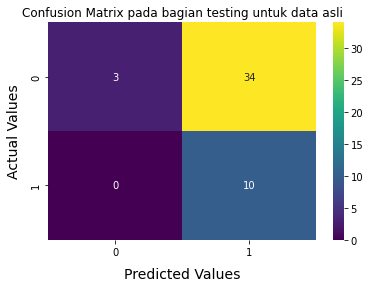

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

# Evaluasi dengan Data Normalisasi

In [ ]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm)

norm_accuracy_dt_train = accuracy_score(Y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)

norm_precision_dt_train = precision_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)

norm_recall_dt_train = recall_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)

norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm)

norm_accuracy_dt_test = accuracy_score(Y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)

norm_precision_dt_test = precision_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)

norm_recall_dt_test = recall_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  0.9814814814814815
Precision pada training set:  0.9814814814814815
Recall pada training set:  0.9814814814814815
Akurasi pada test set:  0.7659574468085106
Precision pada test set:  0.7659574468085106
Recall pada test set:  0.7659574468085106


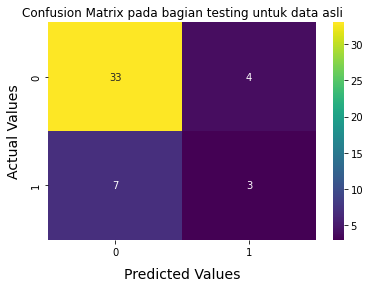

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

# Evaluasi PCA dengan Data Original

In [ ]:
ori_pca_y_pred_dt_train = ori_pca_classifier_dt.predict(X_train_pca)

ori_pca_accuracy_dt_train = accuracy_score(Y_train_pca,ori_pca_y_pred_dt_train)
print('Akurasi pada training set: ', ori_pca_accuracy_dt_train)

ori_pca_precision_dt_train = precision_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_pca_precision_dt_train)

ori_pca_recall_dt_train = recall_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_pca_recall_dt_train)

ori_pca_y_pred_dt_test = ori_pca_classifier_dt.predict(X_test_pca)

ori_pca_accuracy_dt_test = accuracy_score(Y_test_pca,ori_pca_y_pred_dt_test)
print('Akurasi pada test set: ', ori_pca_accuracy_dt_test)

ori_pca_precision_dt_test = precision_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_pca_precision_dt_test)

ori_pca_recall_dt_test = recall_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_pca_recall_dt_test)

Akurasi pada training set:  0.9537037037037037
Precision pada training set:  0.9537037037037037
Recall pada training set:  0.9537037037037037
Akurasi pada test set:  0.8297872340425532
Precision pada test set:  0.8297872340425532
Recall pada test set:  0.8297872340425532


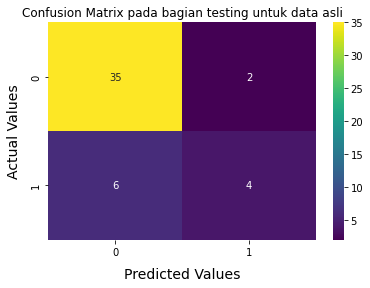

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
sns.heatmap(confusion_matrix(Y_test_pca,ori_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

# Evaluasi Data Normalisasi dengan PCA



In [ ]:
norm_pca_y_pred_dt_train = norm_pca_classifier_dt.predict(X_train_norm_pca)

norm_pca_accuracy_dt_train = accuracy_score(Y_train_norm_pca,norm_pca_y_pred_dt_train)
print('Akurasi pada training set: ', norm_pca_accuracy_dt_train)

norm_pca_precision_dt_train = precision_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_pca_precision_dt_train)

norm_pca_recall_dt_train = recall_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_pca_recall_dt_train)

norm_pca_y_pred_dt_test = norm_pca_classifier_dt.predict(X_test_norm_pca)

norm_pca_accuracy_dt_test = accuracy_score(Y_test_norm_pca,norm_pca_y_pred_dt_test)
print('Akurasi pada test set: ', norm_pca_accuracy_dt_test)

norm_pca_precision_dt_test = precision_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_pca_precision_dt_test)

norm_pca_recall_dt_test = recall_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_pca_recall_dt_test)

Akurasi pada training set:  0.9444444444444444
Precision pada training set:  0.9444444444444444
Recall pada training set:  0.9444444444444444
Akurasi pada test set:  0.8085106382978723
Precision pada test set:  0.8085106382978723
Recall pada test set:  0.8085106382978723


# 10) Melakukan Proses Review Pemodelan

In [ ]:
models = [
          ('Decision Tree Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
          ('Decision Tree Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test),
          ('Decision Tree PCA Data Original', ori_pca_accuracy_dt_train, ori_pca_accuracy_dt_test),
          ('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_train, norm_pca_accuracy_dt_test),
         ]

In [ ]:
# Melakukan perbandingan hasil training akurasi dan test akurasi dengan 4 model
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Decision Tree Data Original,0.324074,0.276596
1,Decision Tree Data Normalisasi,0.981481,0.765957
2,Decision Tree PCA Data Original,0.953704,0.829787
3,Decision Tree PCA Data Normalisasi,0.944444,0.808511


In [ ]:
models_comparison = [
                        ('Decision Tree Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
                        ('Decision Tree Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),
                        ('Decision Tree PCA Data Original', ori_pca_accuracy_dt_test, ori_pca_recall_dt_test, ori_pca_precision_dt_test),
                        ('Decision Tree PCA Data Normalisasi', norm_pca_accuracy_dt_test, norm_pca_recall_dt_test, norm_pca_precision_dt_test),
                    ]

In [ ]:
# Melakukan perbandingan hasil Akurasi, Presisi dan Recall pada data Testing dengan 4 model
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Decision Tree Data Original,0.276596,0.276596,0.276596
1,Decision Tree Data Normalisasi,0.765957,0.765957,0.765957
2,Decision Tree PCA Data Original,0.829787,0.829787,0.829787
3,Decision Tree PCA Data Normalisasi,0.808511,0.808511,0.808511


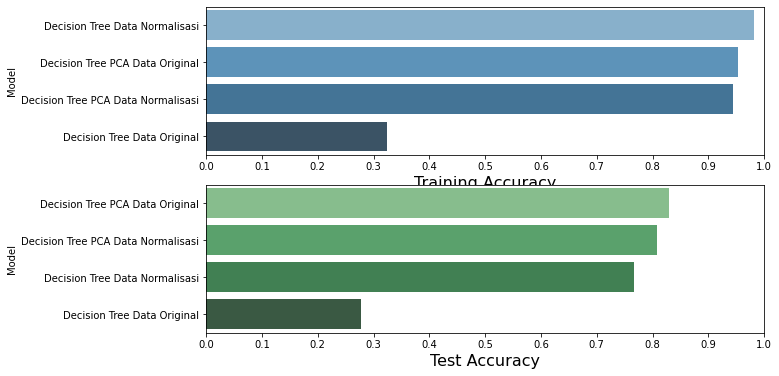

# Kesimpulan :
1. berdasarkan case Hepatitis dapat disimpulkan model yang digunakan berdasarkan case diatas yaitu Decision Tree Data Original dan Decision Tree data normalisasi , dengan tingkat akurasi tertinggi yang didapatkan dari data training sebesar 98% Untuk Decision Tree Data Normalisasi dan pada data testing sebesar 82% untuk Decision Tree PCA Data Original.
2. berdasarkan dari penelitian pada dataset hepatitis diketahui bahwa jumlah terbanyak penderita hepatitis berjenis kelamin laki - laki.
3. berdasarkan dataset hepatitis diketahui lebih banyak penderita hepatitis yang hidup dibandingkan meninggal dunia.
4. dari dataset juga diketahui bahwa penderita hepatitis umunya paling banyak diderita pada usia 30 tahun.
